# Lab 6 - Love and linear ODEs

### Name: Keegan Ballantyne 
### Lab section: Thursday

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint # function for solving ODEs

## Part 1: Phase plane and eigenvalues

Use the code in lab6_examples.ipynb file as a template to create a function with the following characteristics:

* INPUTS: four parameters of a linear 2-variable ODE, x and y limits of the phase plane, grid spacing 
* DO: Produce a phase plane plot and calculate the eigenvalues of the defining matrix
* OUTPUT: the eigenvalues of the defining matrix
 
For each of the six two-variable ODEs in problem set 3, call the function with the given parameters values (a,b,c, d) and classify the phase plane using the eigenvalues.

In [2]:

def phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy):
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y)
    dxdt = a*x+b*y
    dydt = c*x+d*y
    fig, ax=plt.subplots()
    ax.quiver(x, y, dxdt, dydt)
    A = np.array([[a, b],
                [c, d]])
    evals, evecs = np.linalg.eig(A)
    print('eigen vals=', evals[0], evals[1])
    print('eigen vecs=', evecs[0], evecs[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase plane example')
    plt.show()
    return


**Q1.1:** matrix 1 from problem set 3

eigen vals= 2.0 -3.0
eigen vecs= [ 0.70710678 -0.24253563] [0.70710678 0.9701425 ]


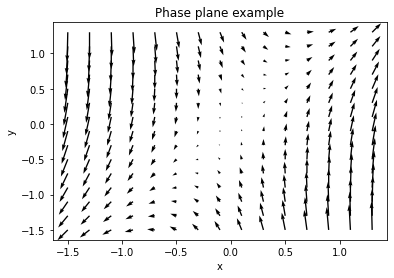

In [3]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2

a = 1
b = 1
c = 4
d = -2

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

saddle point

**Q1.2:** matrix 2 from problem set 3

eigen vals= 3.0 1.0
eigen vecs= [ 0.70710678 -0.70710678] [0.70710678 0.70710678]


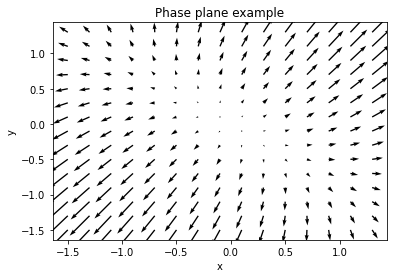

In [4]:
a = 2
b = 1
c = 1
d = 2

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

unstable node

**Q1.3:** matrix 3 from problem set 3

eigen vals= 0.0 -3.0
eigen vecs= [ 0.89442719 -0.4472136 ] [-0.4472136   0.89442719]


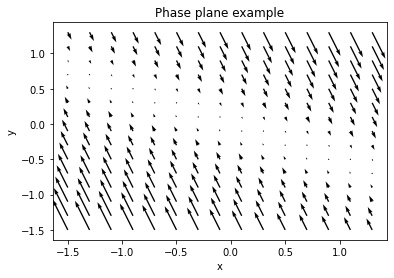

In [5]:
a = 1
b = 2
c = -2
d = -4

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

fixed line

**Q1.4:** matrix 4 from problem set 3

eigen vals= -1.0000000000000004 -5.0
eigen vecs= [ 0.70710678 -0.31622777] [0.70710678 0.9486833 ]


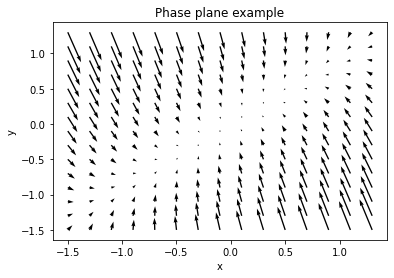

In [6]:
a = -2
b = 1
c = 3
d = -4

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

stable node

**Q1.5:** matrix 5 from problem set 3 

eigen vals= (2.0000000000000004+1.0000000000000004j) (2.0000000000000004-1.0000000000000004j)
eigen vecs= [0.95346259+0.j 0.95346259-0.j] [-0.28603878+0.09534626j -0.28603878-0.09534626j]


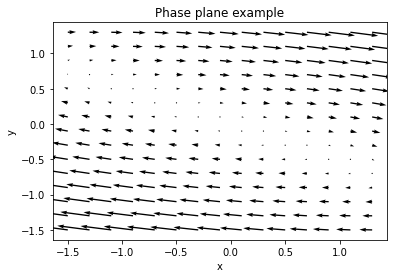

(0.2, 0.2)

In [18]:
a = 5
b = 10
c = -1
d = -1

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

unstable spiral

**Q1.6:** matrix 6 from problem set 3

eigen vals= -0.9999999984222439 -1.000000001577756
eigen vecs= [-0.89442719 -0.89442719] [0.4472136 0.4472136]


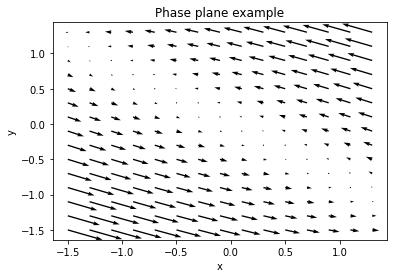

(0.2, 0.2)

In [19]:
a = -3
b = -4
c = 1
d = 1

phasefunc(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)

stable node

## Part 2: Solutions in the phase plane

Use the code in lab6_examples.ipynb file for calculating the numeric solutions of ODE to create a new function with the following characteristics:

 * INPUTS: four parameters of a linear 2-variable ODE, x and y limits of the phase plane, grid spacing, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the given 2-variable ODE
     - overlay solution trajectories starting from given initial values over the phase plane
     - plot different solutions overt time of X in one window and solutions of Y in another
 * OUTPUT: No variables to return
 
Hint: to generate and plot multiple solutions, create a for loop inside the function using the length of the initial values array 

For each of the six two-variable ODEs in problem set 3, use the above-defined function to make the phase portrait and two plots of solutions and
 * comment on where *each variable* (X and Y) of the solution ends up, and whether/how it depends on the intial values  
 * comment on how the classification you provided in part 1 is reflected in the dynamics of the solution trajectories

In [7]:
# define the function for the ODES: note the order of inputs 
def ODE_fun(xy, t, a, b, c, d):  # inputs are: variable array, time, any parameters
    newxy = [a*xy[0]+b*xy[1], c*xy[0]+d*xy[1]]
    return newxy

# [dxdt, dydt] = ODE_fun([x,y], t, a, b, c, d)

def pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit):
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y)
    dxdt = a*x+b*y
    dydt = c*x+d*y
    fig, ax=plt.subplots()
    ax.quiver(x, y, dxdt, dydt)
    A = np.array([[a, b],
                [c, d]])
    evals, evecs = np.linalg.eig(A)
    print('eigen vals=', evals[0], evals[1])
    print('eigen vecs=', evecs[0], evecs[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title('Phase plane example')
    
    #loop for plotting with different initial values
    for i in range(len(xinit)):
        
        init = [xinit[i], yinit[i]] #[intial x, initial y]
        t = np.arange(0, Tmax, dt) # create time vector 
        sol = odeint(ODE_fun, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun

        plt.figure(1)
        
        ax.plot(sol[:,0], sol[:,1])

        plt.figure(2)
        
        plt.plot(t, sol[:,0])
        plt.xlabel('t')
        plt.ylabel('x')
        plt.title('Solution of x and y variables')
        
        plt.figure(3)

        plt.plot(t, sol[:,1])
        plt.xlabel('t')
        plt.ylabel('y')
        plt.title('Solution of x and y variables')
    
    plt.show()
    
    return

**Q2.1:**

eigen vals= 2.0 -3.0
eigen vecs= [ 0.70710678 -0.24253563] [0.70710678 0.9701425 ]


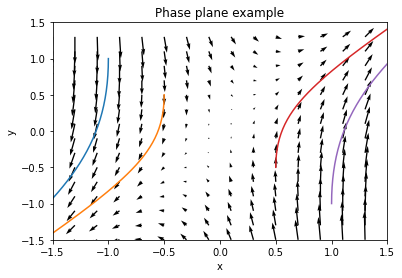

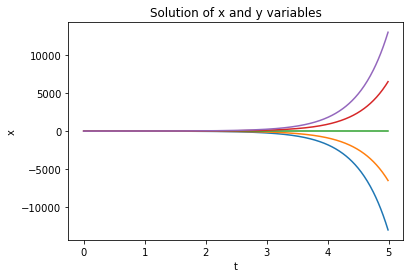

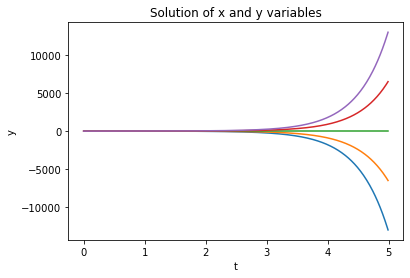

In [8]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = 1, 0.5, 0, -0.5, -1

a = 1
b = 1
c = 4
d = -2

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go to either positive infinity or negative infinity. This does depend on the initial value of X and Y.

**Q2.2:**

eigen vals= 3.0 1.0
eigen vecs= [ 0.70710678 -0.70710678] [0.70710678 0.70710678]


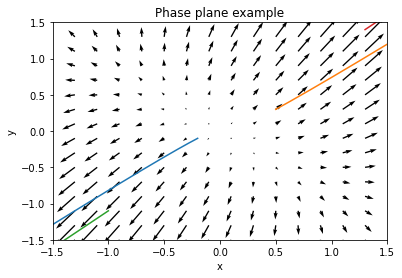

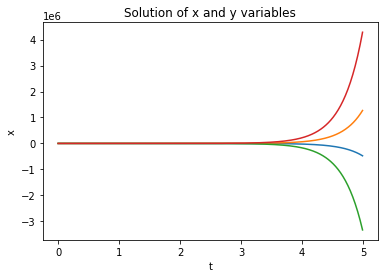

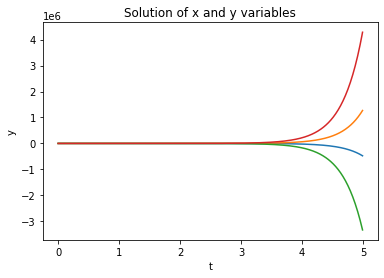

In [9]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -0.2, 0.5,-1, 1.3
yinit = -0.1, 0.3, -1.1, 1.4

a = 2
b = 1
c = 1
d = 2

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go to either positive infinity or negative infinity. This does depend on the initial value of X and Y.

**Q2.3:**

eigen vals= 0.0 -3.0
eigen vecs= [ 0.89442719 -0.4472136 ] [-0.4472136   0.89442719]


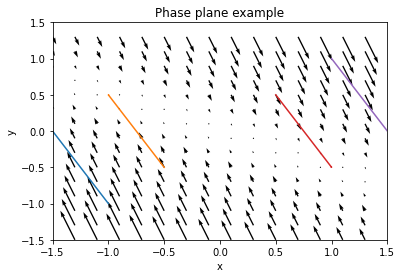

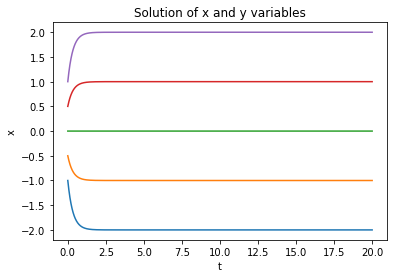

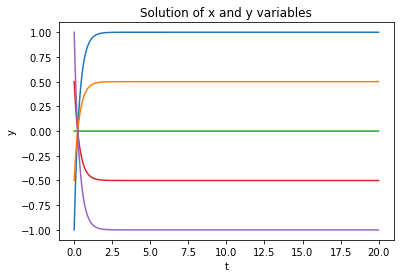

In [10]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 20
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = -1, -0.5, 0, 0.5, 1

a = 1
b = 2
c = -2
d = -4

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go to either a positive fixed value or a negative fixed values. What this fixed value is does depend on the initial values of X and Y.

**Q2.4:**

eigen vals= -1.0000000000000004 -5.0
eigen vecs= [ 0.70710678 -0.31622777] [0.70710678 0.9486833 ]


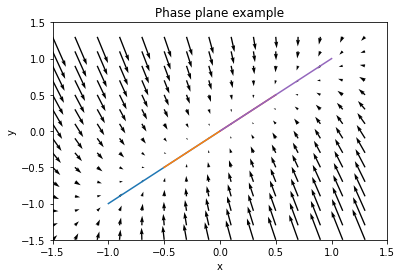

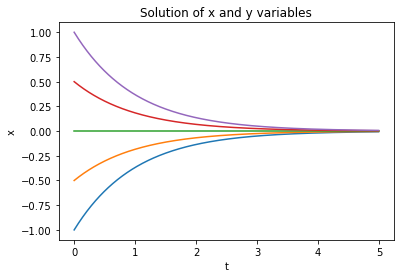

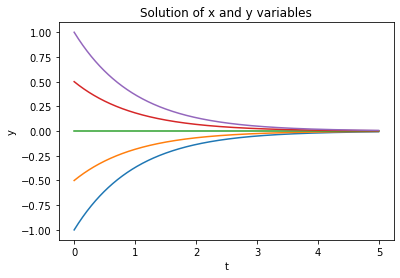

In [11]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = -1, -0.5, 0, 0.5, 1

a = -2
b = 1
c = 3
d = -4

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go to a fixed point of 0. 0 being the fixed point does not depend on the initial values of X and Y.

**Q2.5:**

eigen vals= (2.0000000000000004+1.0000000000000004j) (2.0000000000000004-1.0000000000000004j)
eigen vecs= [0.95346259+0.j 0.95346259-0.j] [-0.28603878+0.09534626j -0.28603878-0.09534626j]


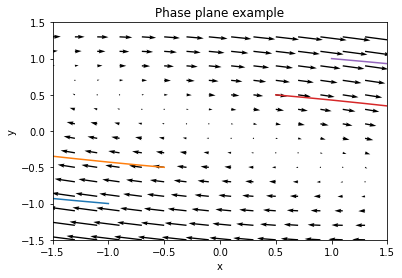

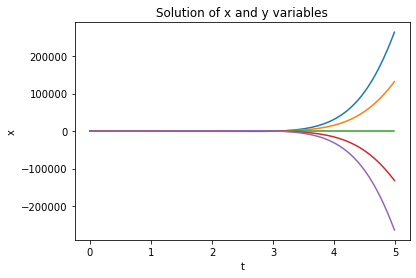

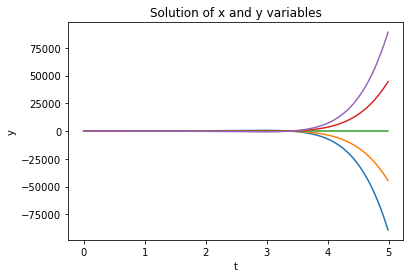

In [12]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = -1, -0.5, 0, 0.5, 1

a = 5
b = 10
c = -1
d = -1

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go to either positive infinity or negative infinity. Going to either positive infinity or negative infinity does not depend on the initial values of X and Y.

**Q2.6:**

eigen vals= -0.9999999984222439 -1.000000001577756
eigen vecs= [-0.89442719 -0.89442719] [0.4472136 0.4472136]


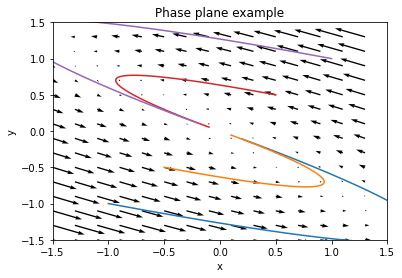

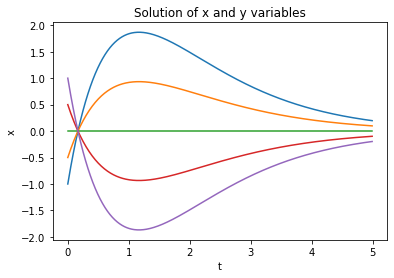

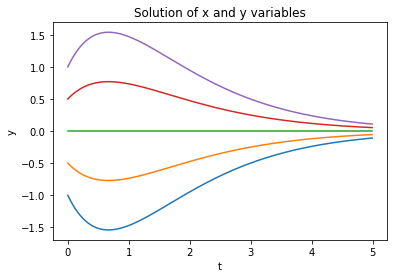

In [13]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = -1, -0.5, 0, 0.5, 1

a = -3
b = -4
c = 1
d = 1

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

X and Y can go towards a fixed point of 0, but it spirals out first. 0 being the fixed point does not depend on the initial values of X and Y.

## Part 3: love in the phase plane
The following model is taken from Steven Strogatz, applied mathematician and educator extraordinaire (see [Stogatz, Nonlinear Dynamics and Chaos](http://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering)).

Suppose person $R$ and person $J$ are in a romantic relationship and their feelings (positive or negative) are quantified by these two variables, while the changes in feelings are described by a system of autonomous linear ODEs:

$$
\frac{dR}{dt} = a R + b J \\
\frac{dJ}{dt} = c R + d J
$$

in which $a$ and $d$ are the self-awareness parameters and $b$ and $c$ are the parameters of responsiveness to the other. 

Use the function you defined in part 2 above to explore the following scenarios in this model.

### 3.1
Suppose $R$ and $J$ are both totally and identically self-absorbed, that is $a=d$ and $b=c=0$. Investigate the dynamics of the model under these conditions, and plot solutions separately for positive self-awareness ($a=d >0$) and for negative self-awareness ($a = d <0$). Describe verbally the predicted fate of the relationship.

eigen vals= 1.0 1.0
eigen vecs= [1. 0.] [0. 1.]


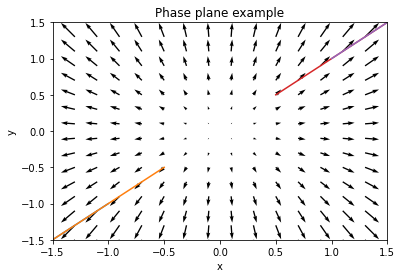

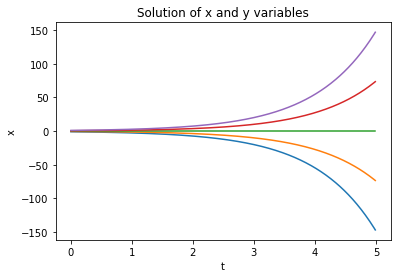

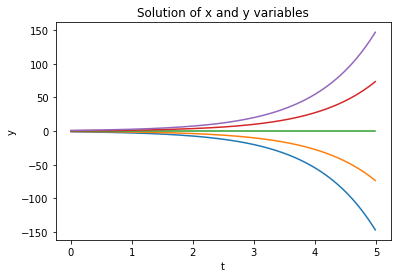

In [14]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0.5, 1
yinit = -1, -0.5, 0, 0.5, 1

a = 1
b = 0
c = 0
d = 1

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

eigen vals= -1.0 -1.0
eigen vecs= [1. 0.] [0. 1.]


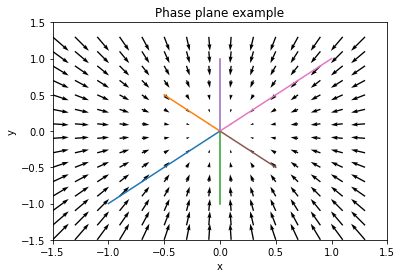

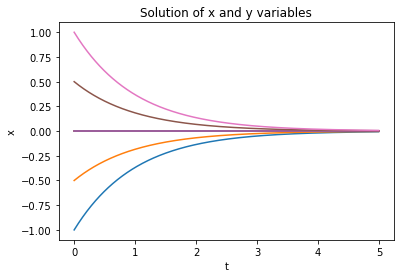

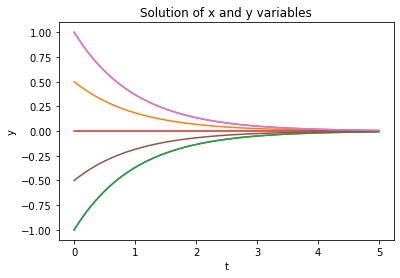

In [17]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1

a = -1
b = 0
c = 0
d = -1

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

The fate of the relationship should show that it converges to a stable node at the origin.

### 3.2
Suppose $R$ and $J$ are again identical, but now they are totally not self-aware that is $a=d=0$ and identically responsive to each other $b=c$. Investigate the dynamics of the model under these conditions, and plot solutions separately for positive responsiveness ($b = c >0$) and for negative responsiveness ($b = c <0$). Describe verbally the predicted fate of the relationship.

eigen vals= 1.0 -1.0
eigen vecs= [ 0.70710678 -0.70710678] [0.70710678 0.70710678]


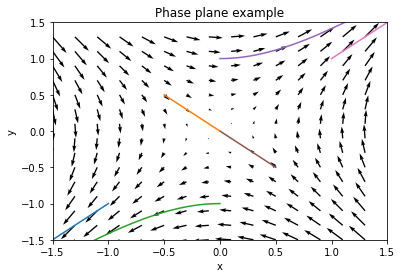

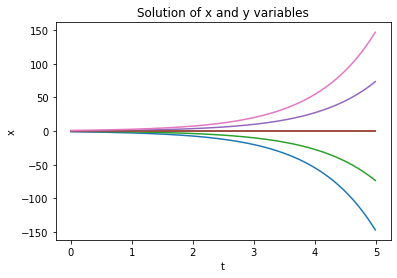

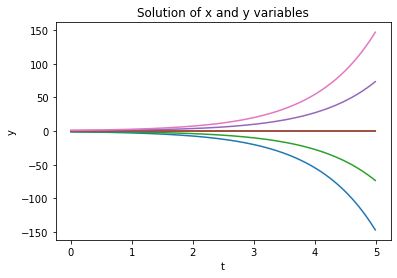

In [18]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1


a = 0
b = 1
c = 1
d = 0

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

eigen vals= 1.0 -1.0
eigen vecs= [0.70710678 0.70710678] [-0.70710678  0.70710678]


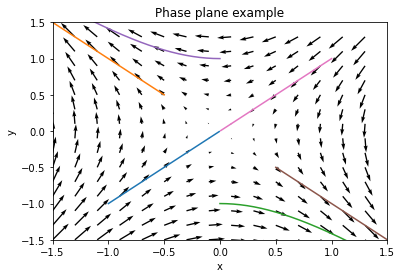

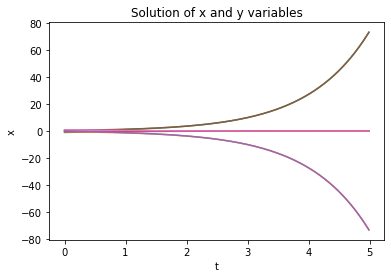

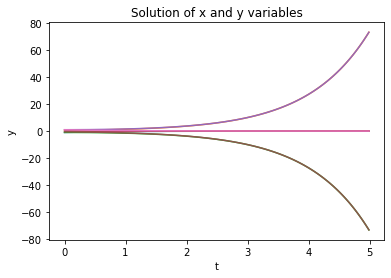

In [19]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1


a = 0
b = -1
c = -1
d = 0

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

The fate of the relationship should show that it is an unstable node at the origin.

### 3.3
Suppose $R$ and $J$ are instead polar opposites, with $a= - d$ and $b = -c$. Investigate the dynamics of the model under these conditions for different parameter values and report all possible relationship dynamics that are possible, with plots and explanations for each scenario.

eigen vals= 1.7320508075688772 -1.7320508075688772
eigen vecs= [ 0.96592583 -0.25881905] [-0.25881905  0.96592583]


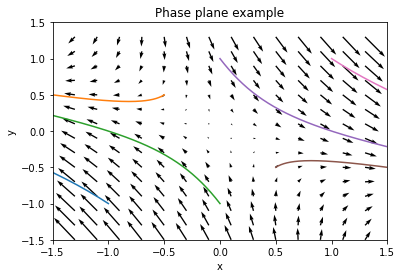

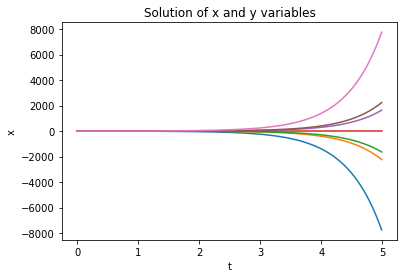

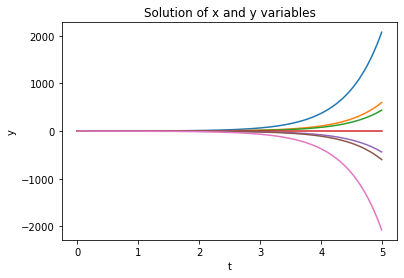

In [32]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1


a = 2
b = 1
c = -1
d = -2

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

eigen vals= -1.7320508075688772 1.7320508075688772
eigen vecs= [-0.96592583  0.25881905] [ 0.25881905 -0.96592583]


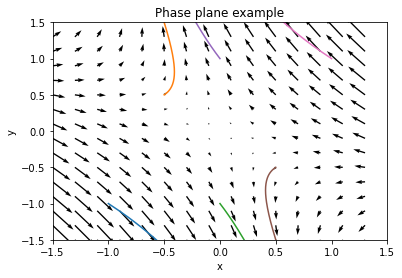

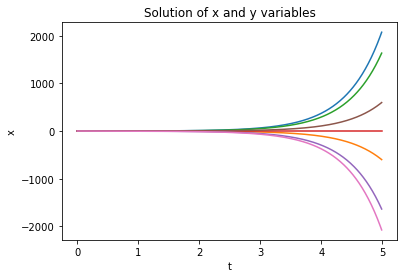

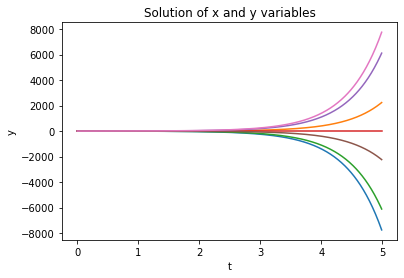

In [33]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1

a = -2
b = -1
c = 1
d = 2

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

eigen vals= 1.7320508075688772 -1.7320508075688772
eigen vecs= [0.96592583 0.25881905] [0.25881905 0.96592583]


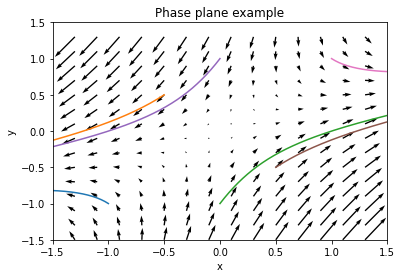

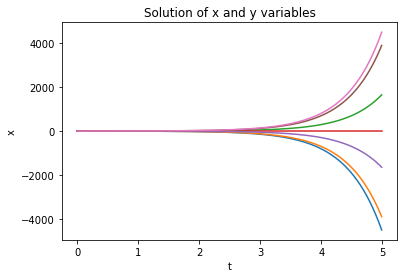

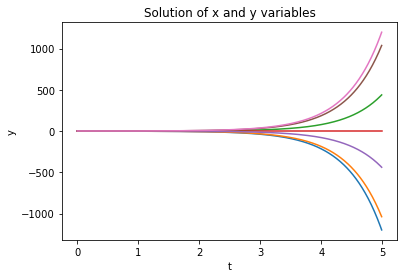

In [34]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1

a = 2
b = -1
c = 1
d = -2

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

eigen vals= (-2.4233767764017036e-16+1.7320508075688772j) (-2.4233767764017036e-16-1.7320508075688772j)
eigen vecs= [0.35355339-0.61237244j 0.35355339+0.61237244j] [0.70710678+0.j 0.70710678-0.j]


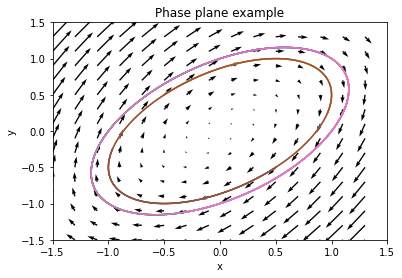

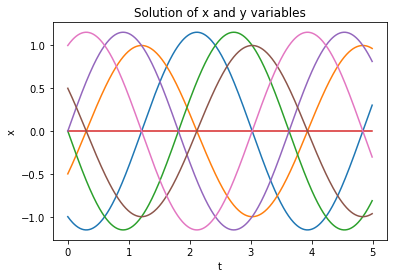

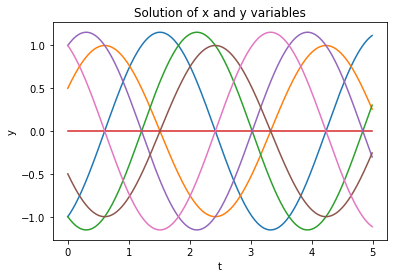

In [35]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2
dy = 0.2
Tmax = 5
dt = 0.01
xinit = -1, -0.5, 0, 0, 0, 0.5, 1
yinit = -1, 0.5, -1, 0, 1, -0.5, 1


a = -1
b = 2
c = -2
d = 1

pt2func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit)

The possible outcomes you can have would be a stable spiral (last graph), and a saddle points (first three graphs).